In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Customer Survey.xlsx')

In [4]:
df.head(2)

,Unnamed: 0,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,2021-03-20,11:53:45,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,2021-03-20,11:54:01,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย


In [5]:
df.drop(['Unnamed: 0','ประทับเวลา'],axis=1,inplace=True)

In [6]:
#df.rename(columns={'ประทับเวลา':'ID'},inplace=True)
#df['ID'] = df.index

In [7]:
df.replace({'ไม่เคย':0,'เคย':1},inplace=True)
df.fillna(1,inplace=True)

In [8]:
df.iloc[:,1:].sum().sort_values(ascending=False)[:10]

กระเป๋า                  44.0
ชาบู                     44.0
ครีมกันแดด               44.0
โรตี                     42.0
กะหรี่(ปั๊บ)             41.0
เม็ดมะม่วงหิมพานต์       40.0
หมอนข้าง                 38.0
หมูแดดเดียว              36.0
แฟน ที่แปลว่าพัดลม       36.0
Software ถูกลิขสิทธิ์    34.0
dtype: float64

In [9]:
df.iloc[:,1:].sum().sort_values(ascending=True)[:10]

PS5                              2.0
เครื่องย่อยเศษอาหาร              2.0
คอร์ส bikini wax                 3.0
เครื่องย่อยเศษอาหาร.1            3.0
Surfskate                        3.0
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น    3.0
ห้องน้ำแมวอัตโนมัติ              3.0
ไดร์เป่าผม Dyson                 4.0
กัญชง                            4.0
Brownie อวกาศ                    5.0
dtype: float64

In [10]:
df=df.astype('int32')

In [11]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True,low_memory=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(หมอนข้าง),(ต้นไม้ประดับห้อง),0.863636,0.704545,0.636364,0.736842,1.045840,0.027893,1.122727
1,(ต้นไม้ประดับห้อง),(หมอนข้าง),0.704545,0.863636,0.636364,0.903226,1.045840,0.027893,1.409091
2,(ต้นไม้ประดับห้อง),(กะหรี่(ปั๊บ)),0.704545,0.931818,0.659091,0.935484,1.003934,0.002583,1.056818
3,(กะหรี่(ปั๊บ)),(ต้นไม้ประดับห้อง),0.931818,0.704545,0.659091,0.707317,1.003934,0.002583,1.009470
4,(แฟน ที่แปลว่าพัดลม),(ต้นไม้ประดับห้อง),0.818182,0.704545,0.613636,0.750000,1.064516,0.037190,1.181818
5,(ต้นไม้ประดับห้อง),(แฟน ที่แปลว่าพัดลม),0.704545,0.818182,0.613636,0.870968,1.064516,0.037190,1.409091
6,(หมูแดดเดียว),(ต้นไม้ประดับห้อง),0.818182,0.704545,0.613636,0.750000,1.064516,0.037190,1.181818
7,(ต้นไม้ประดับห้อง),(หมูแดดเดียว),0.704545,0.818182,0.613636,0.870968,1.064516,0.037190,1.409091
8,(กระเป๋า),(ต้นไม้ประดับห้อง),1.000000,0.704545,0.704545,0.704545,1.000000,0.000000,1.000000
9,(ต้นไม้ประดับห้อง),(กระเป๋า),0.704545,1.000000,0.704545,1.000000,1.000000,0.000000,inf


In [12]:
rules = rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5) ]

In [13]:
rules = rules.sort_values('lift', ascending=False)[:20]

In [15]:
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13674,"(เนื้อย่าง, ครีมกันแดด, โรตี)","(กระเป๋า, เนื้อวากิล)",0.704545,0.659091,0.636364,0.903226,1.370412,0.172004,3.522727
5010,"(ชาบู, ครีมกันแดด, เนื้อวากิล)",(เนื้อย่าง),0.659091,0.704545,0.636364,0.965517,1.370412,0.172004,8.568182
13689,(เนื้อย่าง),"(โรตี, กระเป๋า, ครีมกันแดด, เนื้อวากิล)",0.704545,0.659091,0.636364,0.903226,1.370412,0.172004,3.522727
24621,"(เนื้อวากิล, โรตี)","(เนื้อย่าง, กระเป๋า, ครีมกันแดด, ชาบู)",0.659091,0.704545,0.636364,0.965517,1.370412,0.172004,8.568182
5006,(เนื้อวากิล),"(เนื้อย่าง, ชาบู, โรตี)",0.659091,0.704545,0.636364,0.965517,1.370412,0.172004,8.568182
5005,(เนื้อย่าง),"(เนื้อวากิล, ชาบู, โรตี)",0.704545,0.659091,0.636364,0.903226,1.370412,0.172004,3.522727
24583,"(เนื้อวากิล, โรตี, กระเป๋า, ครีมกันแดด, ชาบู)",(เนื้อย่าง),0.659091,0.704545,0.636364,0.965517,1.370412,0.172004,8.568182
5003,"(ชาบู, เนื้อวากิล)","(เนื้อย่าง, โรตี)",0.659091,0.704545,0.636364,0.965517,1.370412,0.172004,8.568182
5002,"(เนื้อย่าง, ชาบู)","(เนื้อวากิล, โรตี)",0.704545,0.659091,0.636364,0.903226,1.370412,0.172004,3.522727
24619,"(เนื้อย่าง, ครีมกันแดด, ชาบู)","(เนื้อวากิล, กระเป๋า, โรตี)",0.704545,0.659091,0.636364,0.903226,1.370412,0.172004,3.522727


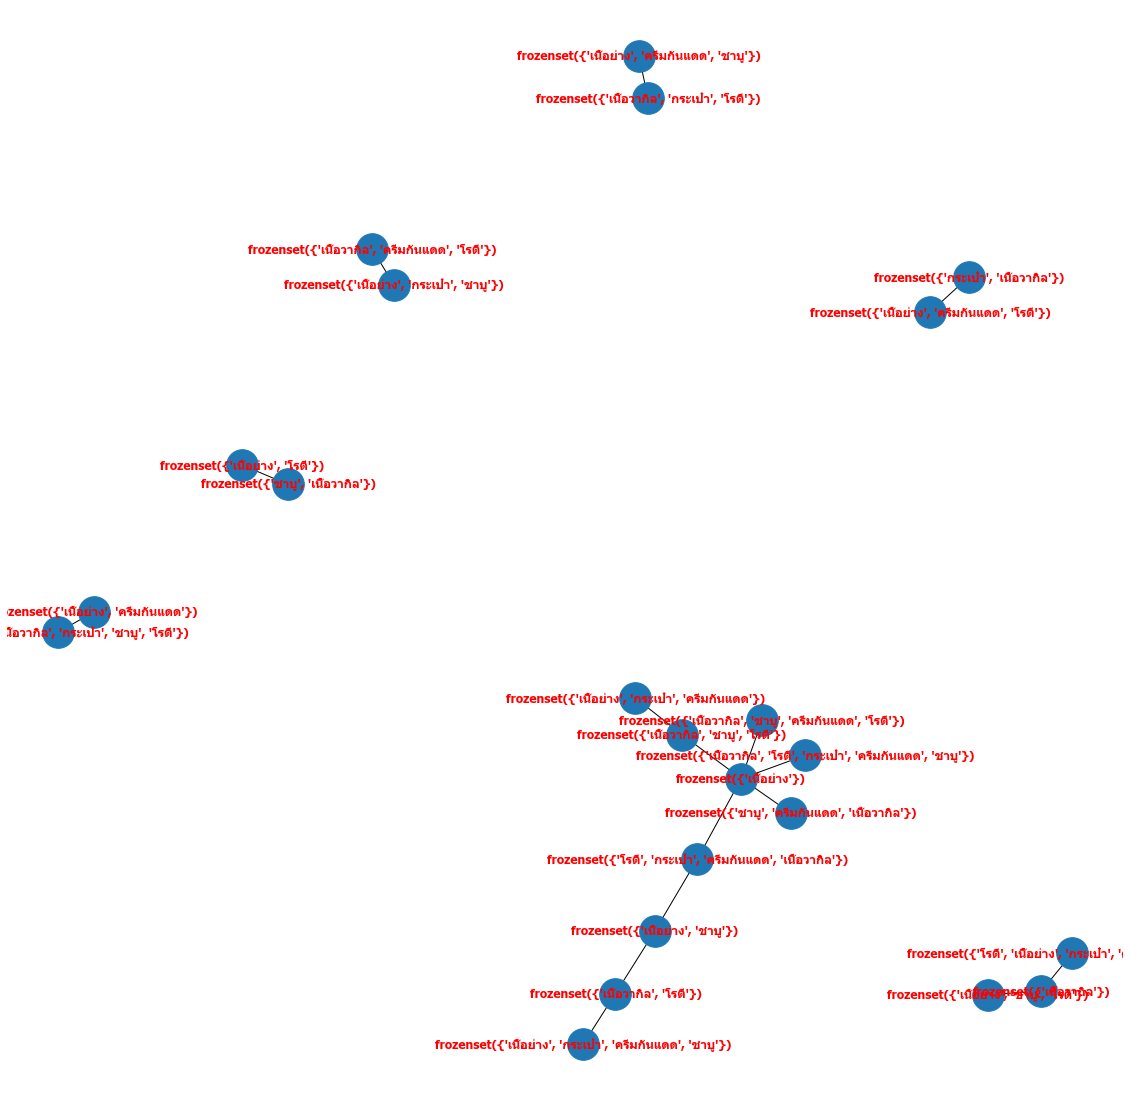

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
from decorator import decorator
fig, ax=plt.subplots(figsize=(20,20))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA, with_labels=True, node_size=1000, font_color="red", font_weight="bold",font_family='Tahoma')
plt.show()

In [18]:
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)

In [19]:
item_item_matrix

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
จักรยานเสือภูเขา,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
คอลลาเจน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brownie อวกาศ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
แม่โขง,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Botox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
กัญชา,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
กัญชง,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
เครื่องวัดความดัน,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
หลอดไฟเปลี่ยนสีได้,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
คอร์ส bikini wax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(df.iloc[:,i],df.iloc[:,j])

In [22]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [40]:
links_filtered=links.loc[ (links['value'] > 0.6) & 
                         (links['item'] != links['related item']) ]

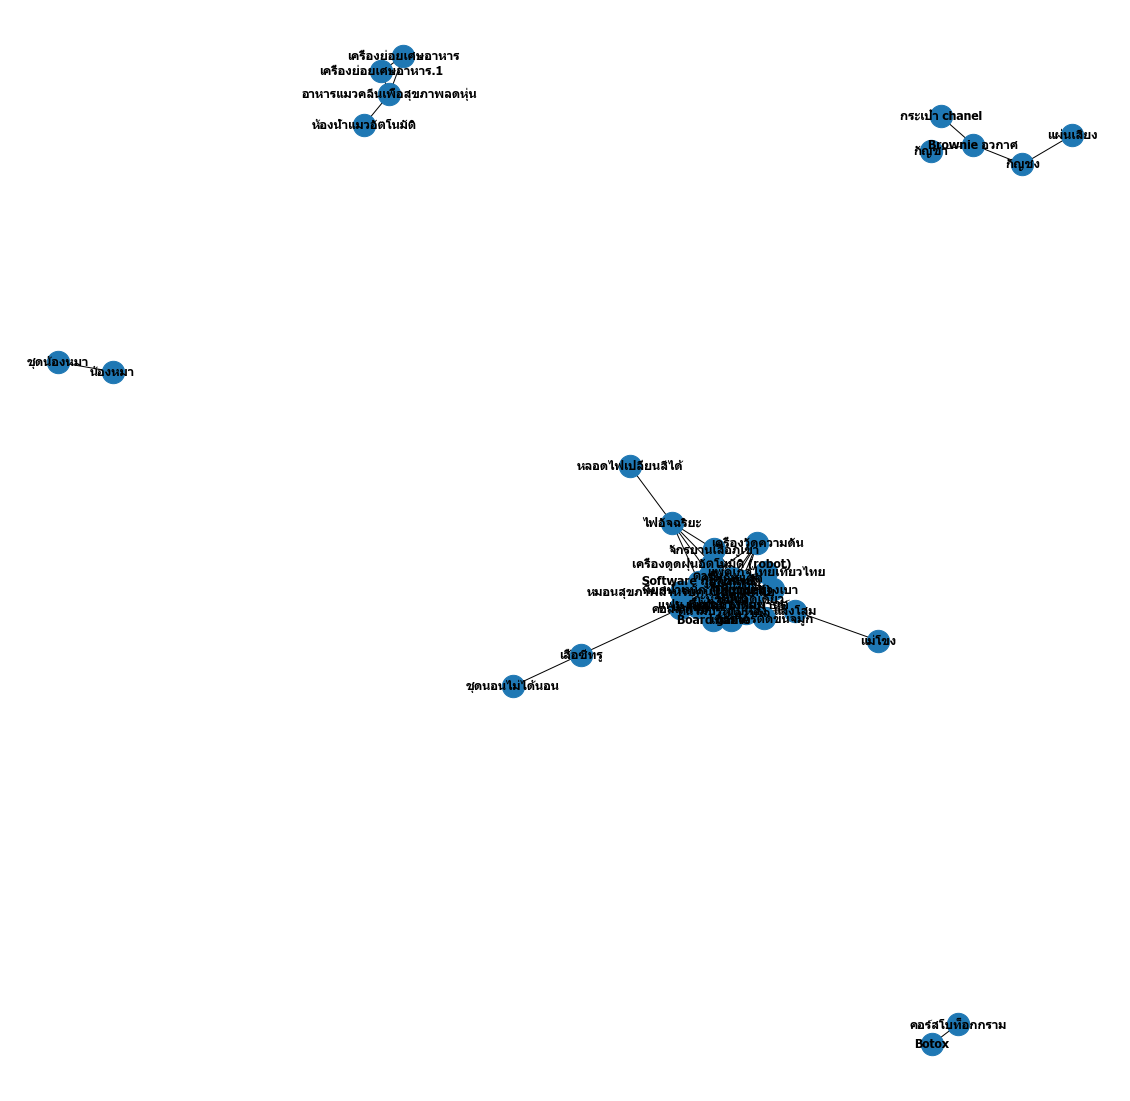

In [41]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(20,20))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA, with_labels=True, node_size=500, font_color="black", font_weight="bold",font_family='Tahoma')
plt.show()

In [49]:
#Sort by Item
links_filtered

,item,related item,value
12,จักรยานเสือภูเขา,หมอนข้าง,0.60833
17,จักรยานเสือภูเขา,Lego,0.625463
21,จักรยานเสือภูเขา,ที่ยกน้ำหนัก (Dumbell),0.673575
31,จักรยานเสือภูเขา,กระเป๋า,0.603023
32,จักรยานเสือภูเขา,ชาบู,0.603023
39,จักรยานเสือภูเขา,ไฟอัจฉริยะ,0.601338
46,จักรยานเสือภูเขา,โรตี,0.617213
59,จักรยานเสือภูเขา,Software ถูกลิขสิทธิ์,0.600245
60,จักรยานเสือภูเขา,ครีมกันแดด,0.603023
72,คอลลาเจน,ต้นไม้ประดับห้อง,0.636655


In [48]:
#Sort by association
links_filtered.sort_values(['value'],ascending=False).head(40)

,item,related item,value
1923,กระเป๋า,ชาบู,1.0
3692,ครีมกันแดด,ชาบู,1.0
1983,ชาบู,กระเป๋า,1.0
1951,กระเป๋า,ครีมกันแดด,1.0
3691,ครีมกันแดด,กระเป๋า,1.0
2012,ชาบู,ครีมกันแดด,1.0
3706,ครีมกันแดด,โรตี,0.977008
2838,โรตี,ชาบู,0.977008
2837,โรตี,กระเป๋า,0.977008
1937,กระเป๋า,โรตี,0.977008
